This case study is based on an IBM Sample Data Set and can be used for modelling customer churn and support insight into the valuable factors for retention programmes. 



*   INPUTS: 
  * **Services**: phone, multiple lines, internet, online security, online backup, device protection, tech support and streaming TV and movies. 
  * **Account information**: fidelity, contract, payment method, paperless billing, monthly charges, total charges.
  * **Demographics information**: gender, age range, if they have partners and dependents


*   OUTPUT: 
  * **Churn**



Our **OBJECTIVE** is to assess the most relevant features to be considered for a customer retention programme. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

### **FIRST STEP**

**Read and process the input data**

In [2]:
raw_data = pd.read_csv('AIA_Churn_Modelling_Case_Study.csv')
print(raw_data.columns)
raw_data.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Let's see the types of our features
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Check if there is any duplicate row 
print(raw_data.shape)
raw_data = raw_data.drop_duplicates()
print(raw_data.shape)

(7043, 21)
(7043, 21)


Fine, there is no any duplicate row. \\
Our next step is to drop customerID column since it's non informative for us: 

In [5]:
raw_data = raw_data.drop(columns='customerID')

The column Totalcharges should have a numeric type instead an Object type, let's convert it:

In [6]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'],errors='coerce')
raw_data['TotalCharges'].dtypes

dtype('float64')

### Treatment of missing values

In [7]:
# We first check if there is any column with missing values
raw_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# We can just drop the rows with missing values or to impute them. I decide to impute them, since there is not that many missing values. 
# Imputing them with the median or so would not affect that much into our results
df = raw_data
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
raw_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **SECOND STEP**
**Features visualization**

Discrete columsn are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numeric columsn are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


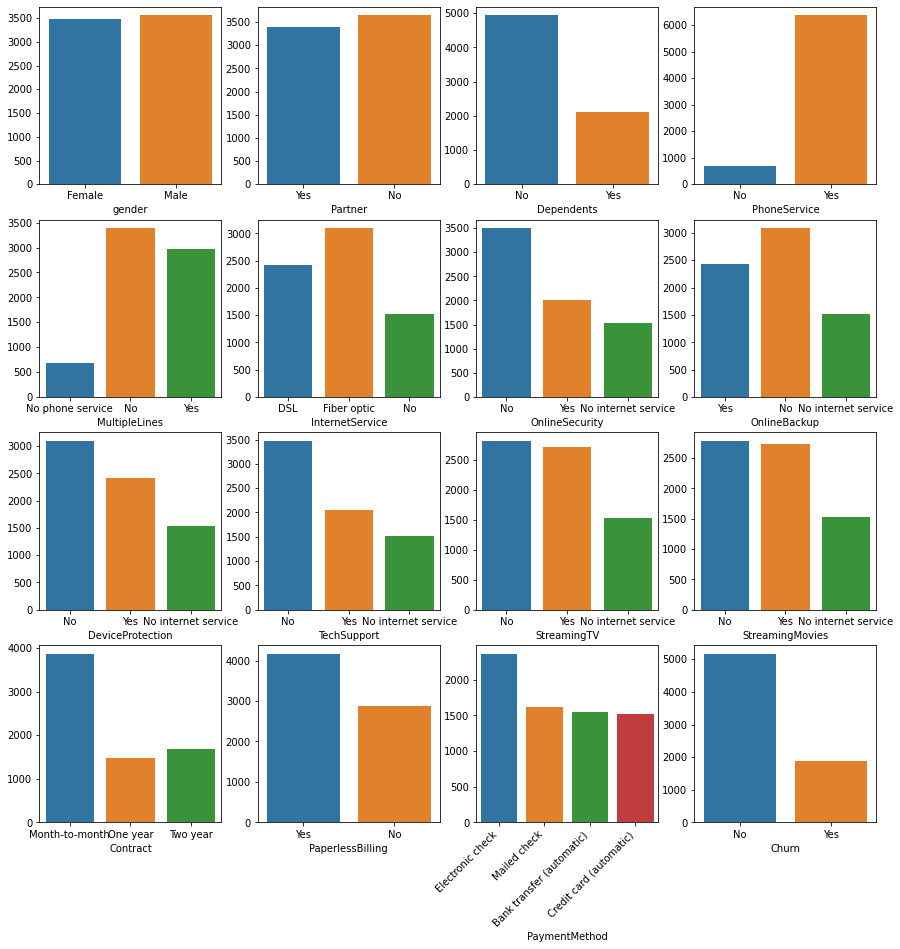

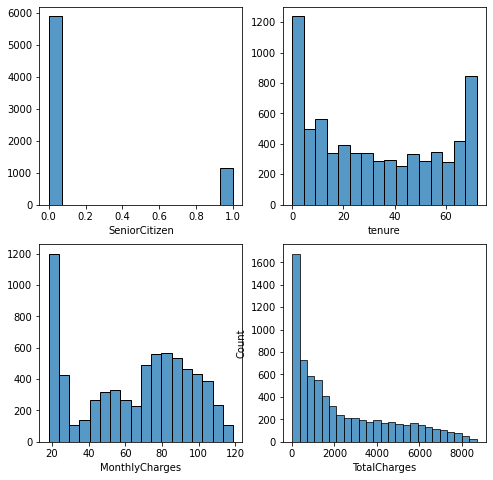

In [9]:
# Representation of each variable

# 1. Discrete values representation 

discrete_columns = df.select_dtypes(include = 'object').columns.to_list()
print(f'Discrete columsn are: {discrete_columns}')
num_dis_columns = len(discrete_columns)
fig,ax = plt.subplots(int(np.sqrt(num_dis_columns)),int(np.sqrt(num_dis_columns)),figsize=(15,15))
for idx,col_dis in enumerate(discrete_columns):
  chart = sns.countplot(df[col_dis], ax=ax[int(idx/4),(idx%4)])
  chart.set(ylabel=None)
  if col_dis == 'PaymentMethod':
    chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')


# 2. Numerical values representation 
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.to_list()
print(f'Numeric columsn are: {numeric_columns}')
num_num_columns = len(numeric_columns)
fig,ax = plt.subplots(int(np.sqrt(num_num_columns)),int(np.sqrt(num_num_columns)),figsize=(8,8))
for idx,col_num in enumerate(numeric_columns):
  chart.set(ylabel=None)
  chart = sns.histplot(df[col_num], ax=ax[int(idx/2),(idx%2)])
  

One of the conclusions we extract from here is that there is a class imbalance in our target "Churn". In this way, the first models I will try are those related with Decision trees, since they ofthen perform well on imbalance datasets.


### **THIRD STEP**

**Binary encoding and One-hot encoding for categorical variables**

In [10]:
# Transformation of BINARY variables (Partner, Dependents, PhoneService, PaperlessBilling, Churn)

list_binary_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in list_binary_columns:
  df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender']= df['gender'].map({'Female': 1, 'Male': 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
# Transformation of CATEGORICAL variables (MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod)
# I decide to do this encoding instead of label encoding, since we cannot assume a certain order between labels.
df =pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


### **FOURTH STEP**

**Outliers detection**

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


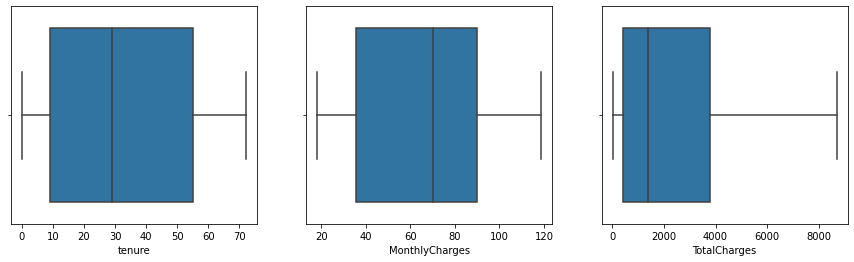

In [12]:
# Outliers detection with continuous variables
numeric_columns = ['tenure','MonthlyCharges','TotalCharges']
fig,ax = plt.subplots(1,3,figsize=(15,4))
for idx,col_num in enumerate(numeric_columns):
  sns.boxplot(x=df[col_num], ax=ax[idx])

# Another way to check that is seeing the statistics

df[numeric_columns].describe()

### **FIFTH STEP**

**Analysis of correlations**

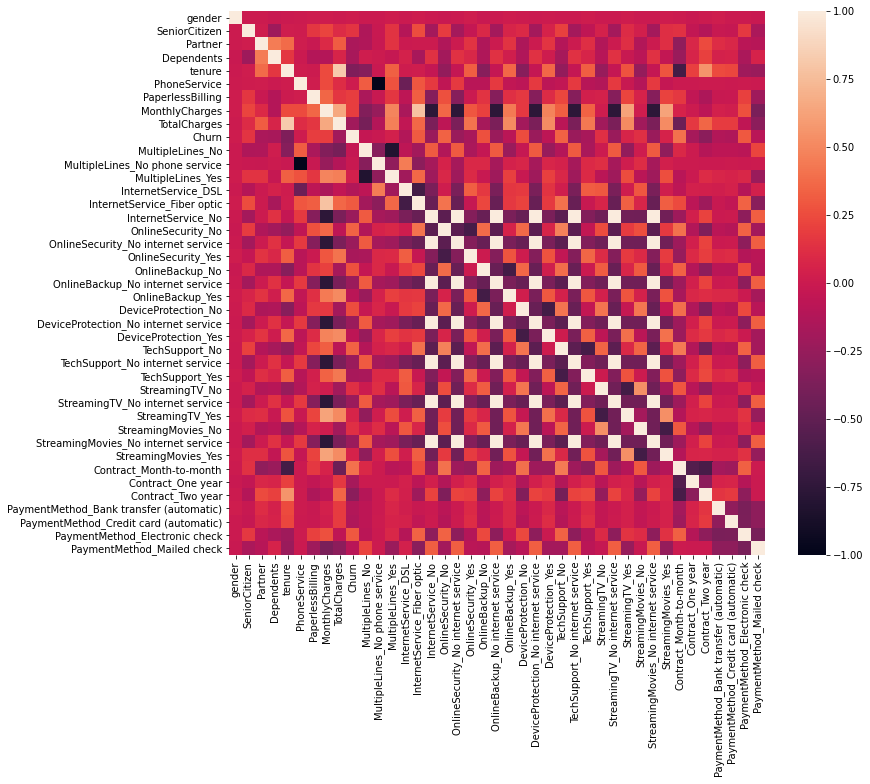

In [13]:
# Let's find correlated/dependent variables

from sklearn.preprocessing import MinMaxScaler
df_norm = MinMaxScaler().fit_transform(X=df)
norm_data = pd.DataFrame(df_norm,columns= df.columns)
fig,ax =  plt.subplots(figsize=(12, 10))
sns.heatmap(norm_data.corr())

In [14]:
norm_data.corr()['Churn'].abs().sort_values()

gender                                     0.008612
PhoneService                               0.011942
MultipleLines_No phone service             0.011942
MultipleLines_No                           0.032569
MultipleLines_Yes                          0.040102
StreamingMovies_Yes                        0.061382
StreamingTV_Yes                            0.063228
DeviceProtection_Yes                       0.066160
OnlineBackup_Yes                           0.082255
PaymentMethod_Mailed check                 0.091683
PaymentMethod_Bank transfer (automatic)    0.117937
InternetService_DSL                        0.124214
StreamingTV_No                             0.128916
StreamingMovies_No                         0.130845
PaymentMethod_Credit card (automatic)      0.134302
Partner                                    0.150448
SeniorCitizen                              0.150889
Dependents                                 0.164221
TechSupport_Yes                            0.164674
OnlineSecuri

The conclusion of the figure above is that the most relevant features are Contract-Month-to_month, Tenure,OnlineSecurity(No), etc. On the other side, the less importat variables are the gender, phone Service or Multuple_lines. Let's see how is such correlation through visualization.

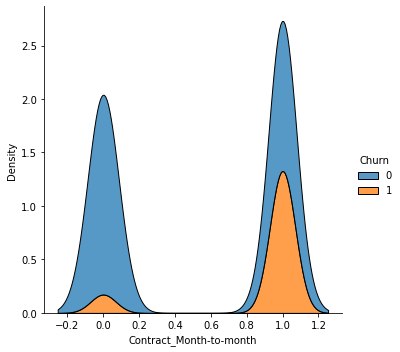

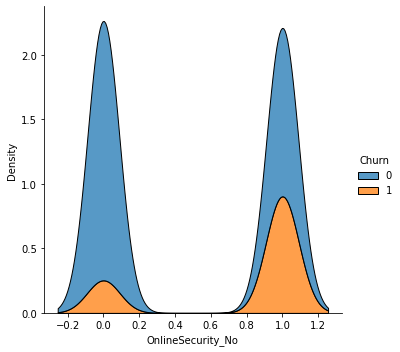

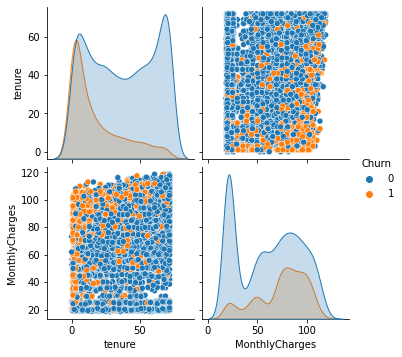

In [15]:
high_corr_variables = ['Contract_Month-to-month','OnlineSecurity_No']
for idx,var in enumerate(high_corr_variables):
  sns.displot(df,x=var,hue='Churn',kind='kde',multiple="stack")  

sns.pairplot(df,vars=['tenure','MonthlyCharges'],hue='Churn')

Now it is time for some Machine learning!! 
Let's try with different models

### **SIXTH STEP**

**PREDICTIVE MODEL**

### Train-test-validation sets creation


In [16]:
Y = norm_data['Churn']
X = norm_data.drop(columns='Churn')

In [17]:
from sklearn.model_selection import train_test_split
# 80-20 proportions
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6)
print(f'Number of Train samples:{len(X_train)}')
print(f'Number of Test samples:{len(X_test)}')

Number of Train samples:5634
Number of Test samples:1409


#### **Random forest classifier**

As I before explained, I first will try with Decision trees algorithms due to the imbalance class problem. Particularly I first try with Random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Choose the hyperparameter max_depth of random forest 

list_depths = [1,2,4,8,10,15,20,25,50]
list_accuracy = []
for depth in list_depths:
  clf = RandomForestClassifier(max_depth=depth, random_state=0)
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  list_accuracy.append(accuracy_score(y_test, y_test_pred))

best_max_depth = list_depths[np.argmax(list_accuracy)]
print(f'The max_depth selected for our Random forest is --> {best_max_depth}')



The max_depth selected for our Random forest is --> 10


In [19]:

# Single RF model with selected max_depth
def train_RF(max_depth,X_train,y_train,X_test,y_test,plot_importance=False):
  clf = RandomForestClassifier(max_depth=best_max_depth, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  plot_confusion_matrix(clf,X_test,y_test)
  f1score = f1_score(y_test,y_pred)
  auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
  print(f'The accuracy with Random Forest classifier is --> {accuracy}')
  print(f'The F1-score with Random Forest classifier is --> {f1score}')
  print(f'The AUC with Random Forest classifier is --> {auc}')

  if plot_importance:
    list_importances = list(zip(X_train, clf.feature_importances_))
    convert_list = []
    for i in range(len(list_importances)):
      convert_list.append([list_importances[i][0],list_importances[i][1]])
    df_importances = pd.DataFrame(convert_list,columns=['Feature','Importance']) 

    p = sns.relplot(x='Feature', y='Importance', ci=None,ax=ax, kind="line", data=df_importances)
    p.set_xticklabels(rotation=45)
    p.set_xticklabels(horizontalalignment='right')
    p.fig.set_figwidth(20)
    p.fig.set_figheight(4)

    importance_tenure = df_importances.loc[df_importances.Feature=='tenure'].Importance.values[0]
    print(f'The importance of Tenure in the decision is --> {importance_tenure}')
    importance_Tcharges = df_importances.loc[df_importances.Feature=='TotalCharges'].Importance.values[0]
    print(f'The importance of Total charges is --> {importance_Tcharges}')
    importance_ContMonth = df_importances.loc[df_importances.Feature=='Contract_Month-to-month'].Importance.values[0]
    print(f'The importance of tenure is --> {importance_ContMonth}')


The accuracy with Random Forest classifier is --> 0.8090844570617459
The F1-score with Random Forest classifier is --> 0.5709728867623606
The AUC with Random Forest classifier is --> 0.8386054467220783
The importance of Tenure in the decision is --> 0.14530776296814144
The importance of Total charges is --> 0.13430004742647628
The importance of tenure is --> 0.10790194679996304


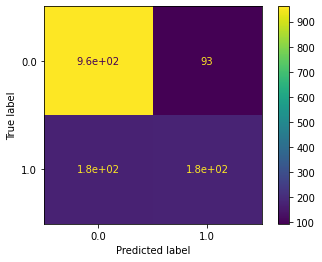

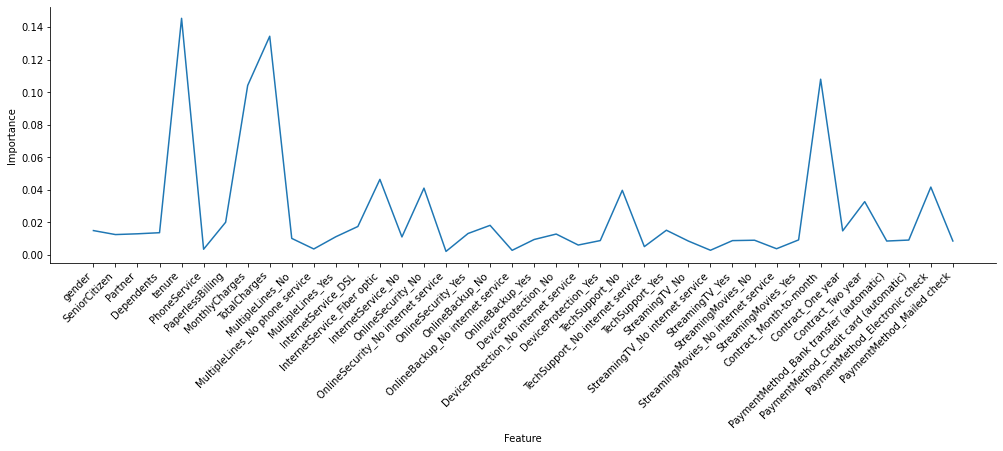

In [20]:
max_depth=10
train_RF(max_depth,X_train,y_train,X_test,y_test,plot_importance=True)


We can see that the accuracy is not bad, however the F1 score is not that large. Furthermore, in the confusion matrix is shown that the good performance is just for one of the classes. The reason is that our label is imbalanced (the number of 1s is quite higher than the number of 0s) \\
How can we fight against that class imbalance? \\
There are several techniques, such as penalized models or sampling techniques. I will focus on sampling techniques, such as undersampling or oversampling. Underfitting may lead us to a loss of information while oversampling may lead us to overfitting due to the duplicate samples. \\

Class 0: 5174
Class 1: 1869
Proportion: 2.77 : 1


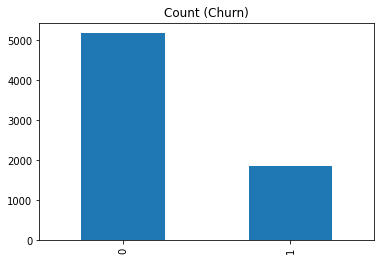

In [21]:
# Let's see the proportions of each class in order to demonstrate the imbalance
target_count = df.Churn.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (Churn)')

The accuracy with Random Forest classifier is --> 0.8328502415458937
The F1-score with Random Forest classifier is --> 0.8389199255121043
The AUC with Random Forest classifier is --> 0.906908018495819


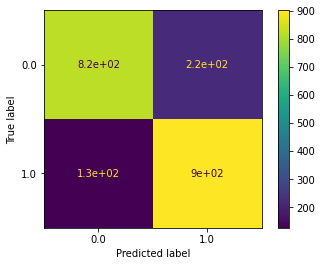

In [22]:
# Let's try with oversampling through SMOTE, which generates minority-class data from their k-nearest neighbors

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=6)
max_depth=10
train_RF(max_depth,X_train,y_train,X_test,y_test)

The accuracy with Random Forest classifier is --> 0.8604412519240636
The F1-score with Random Forest classifier is --> 0.8664047151277013
The AUC with Random Forest classifier is --> 0.9304258431394867


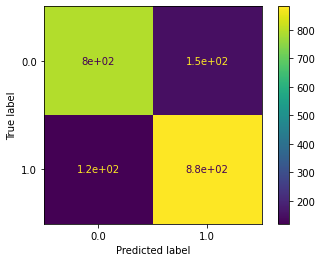

In [23]:
# Let's try oversampling followed by undersampling
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=6)
max_depth=10
train_RF(max_depth,X_train,y_train,X_test,y_test)

We achieve better results when combining oversampling (SMOTE) and undersampling (Tomek links), which removes those samples of the majority class that are closer to samples of the other class. 

Now we've solved the class imbalance problem, let's try with another type of model. \\
Let's try with **Gradient Boosting classifier**:

In [24]:
# Choose the hyperparameter max_depth of gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

list_depths = [1,2,4,8,10,15,20,25,50]
list_accuracy = []
for depth in list_depths:
  clf = GradientBoostingClassifier(max_depth=depth)
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  list_accuracy.append(accuracy_score(y_test, y_test_pred))

best_max_depth = list_depths[np.argmax(list_accuracy)]
print(f'The max_depth selected for our GB classifier is --> {best_max_depth}')

The max_depth selected for our GB classifier is --> 10


In [25]:
def train_GB(max_depth,X_train,y_train,X_test,y_test):
  clf_gb = GradientBoostingClassifier(max_depth=best_max_depth)
  clf_gb.fit(X_train, y_train)
  y_pred = clf_gb.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  plot_confusion_matrix(clf_gb,X_test,y_test)
  f1score = f1_score(y_test,y_pred)
  auc = roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1])
  print(f'The accuracy with Gradient boost classifier is --> {accuracy}')
  print(f'The F1-score with Gradient boost classifier is --> {f1score}')
  print(f'The AUC with Gradient boost classifier is --> {auc}')






The accuracy with Gradient boost classifier is --> 0.8860954335556696
The F1-score with Gradient boost classifier is --> 0.8903162055335968
The AUC with Gradient boost classifier is --> 0.9526243184170203


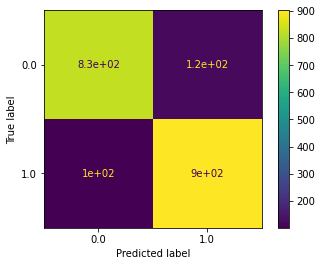

In [26]:
max_depth_gb=8
train_GB(max_depth_gb,X_train,y_train, X_test, y_test)

Let's try also with a **Support Vector Machine Classifier**

The accuracy with SVC is --> 0.8342739866598256
The F1-score with SVC is --> 0.8395429706905116
The AUC with SVC is --> 0.9169506815302868


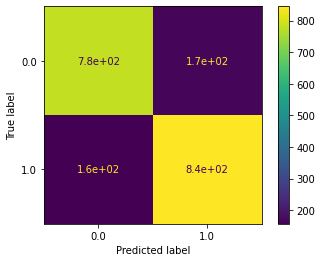

In [27]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
plot_confusion_matrix(svc,X_test,y_test)
f1score = f1_score(y_test,y_pred)
auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
print(f'The accuracy with SVC is --> {accuracy}')
print(f'The F1-score with SVC is --> {f1score}')
print(f'The AUC with SVC is --> {auc}')



## **CONCLUSIONS**

The best model performance has been achieved with a **Gradient Boosting Classifier** with a maximum depth of trees of 8. This performance is a **F1 score of 0.89** and **AUC of 0.952**. In such process, I have deal with missing values and class imbalance, which have been solved with median imputation and sampling techniques, respectively. \\

Apart from that, I have analyze which are the correlations between our features and the target (customer churn) and also the most important ones in order to have as best retention programme design as possible.